In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('../data/REVL COOF VALUATION 07-2023.csv')

df = df[[c for c in df.columns if 'unnamed' not in c.lower()]]
x = [c.replace('\n','') for c in df.columns]
x = [c.replace(' ','_') for c in x]
x = [c.lower() for c in x]
df.columns = x
df['naics'] = df['naics'].astype(int)

In [2]:
df['term_yrs']=df['term']//12

x_df = df[['naics','loan_spread','loan_rate','strip_rate','original_balance','current_balance','term_yrs','term','age','rmos']]
y_df = df['valuation_multiple']


In [3]:
X = x_df
y = y_df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()

reg_model.fit(X_train, y_train)


LinearRegression()

In [5]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test data
y_pred = reg_model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r_squared)


Mean Squared Error (MSE): 0.022169287886845124
R-squared: 0.8120293676088726


In [6]:
# Get the coefficients and their corresponding feature names
coefficients = pd.Series(reg_model.coef_, index=X.columns)

# Sort the coefficients in descending order to identify the most important features
sorted_coefficients = coefficients.sort_values(ascending=False)

# Print the sorted coefficients
print("Feature importance (sorted):")
print(sorted_coefficients)


Feature importance (sorted):
loan_spread         2.800198e+00
loan_rate           2.800198e+00
rmos                2.871700e-01
age                 2.516128e-01
original_balance    2.998591e-06
naics              -3.868829e-07
current_balance    -3.025081e-06
term_yrs           -1.514726e-01
strip_rate         -1.948469e-01
term               -2.679851e-01
dtype: float64


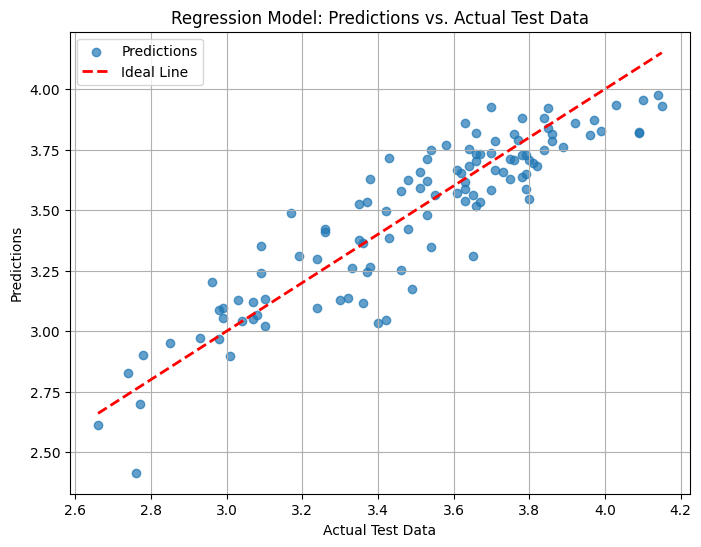

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the predictions vs the actual test data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2, label='Ideal Line')
plt.xlabel('Actual Test Data')
plt.ylabel('Predictions')
plt.title('Regression Model: Predictions vs. Actual Test Data')
plt.legend()
plt.grid(True)
plt.show()


### Test New Loan Tape

In [8]:
X

,naics,loan_spread,loan_rate,strip_rate,original_balance,current_balance,term_yrs,term,age,rmos
0,111421,0.0275,0.1125,0.02555,4486841.50,4486841.50,25.0,301.2,14.7,286.5
1,332215,0.0225,0.1075,0.02055,4451666.05,4451666.05,25.0,301.0,15.5,285.5
2,623220,0.0175,0.1025,0.02105,3749397.31,3749397.31,26.0,313.0,19.4,293.6
3,722511,0.0075,0.0925,0.00555,3732528.76,3732528.76,25.0,301.0,8.4,292.5
4,531120,0.0050,0.0900,0.00305,3727262.08,3727262.08,25.0,300.9,9.3,291.6
...,...,...,...,...,...,...,...,...,...,...
557,423210,0.0125,0.0975,0.00480,948000.00,948000.00,25.0,300.2,1.2,299.0
558,624310,0.0175,0.1025,0.00980,3622500.00,3622500.00,25.0,300.2,0.7,299.5
559,238150,0.0200,0.1050,0.02165,972165.58,972165.58,15.0,180.1,3.3,176.9
560,624410,0.0200,0.1050,0.01730,359325.00,359325.00,15.0,180.1,2.1,178.0


In [9]:
test_df = pd.read_csv('../data/valuation_test.csv')

test_df = test_df[[c for c in test_df.columns if 'unnamed' not in c.lower()]]
x = [c.replace('\n','') for c in test_df.columns]
x = [c.replace(' ','_') for c in x]
x = [c.lower() for c in x]
test_df.columns = x
test_df['naics'] = test_df['naics'].astype(int)
test_df['term_yrs']=test_df['term']//12
x_test_df = test_df[['naics','loan_spread','loan_rate','strip_rate','original_balance','current_balance','term_yrs','term','age','rmos']]

In [10]:
x_test_df

,naics,loan_spread,loan_rate,strip_rate,original_balance,current_balance,term_yrs,term,age,rmos
0,512110,0.0275,0.1100,0.00730,131250.00,131250.00,10,120,2.3,118
1,722511,0.0275,0.1100,0.03405,505308.82,505308.82,10,120,3.2,117
2,323111,0.0175,0.1000,0.02955,186746.92,186746.92,10,120,3.2,117
3,423450,0.0275,0.1100,0.03955,156000.00,156000.00,10,120,3.4,117
4,238990,0.0100,0.0925,0.01655,2850000.00,2850000.00,10,120,3.5,116
...,...,...,...,...,...,...,...,...,...,...
159,812210,0.0225,0.1050,0.03455,245712.25,245712.25,14,174,18.4,156
160,722511,0.0175,0.1000,0.01030,777652.64,777652.64,25,306,18.6,287
161,621310,0.0275,0.1100,0.01540,543035.62,543035.62,25,300,18.0,282
162,311999,0.0275,0.1100,0.04105,1607009.53,1607009.53,15,186,27.0,159


In [11]:
# Make predictions on the test data
y_pred = reg_model.predict(x_test_df)


In [28]:
len(y_pred)
test_df['multiple_forecast'] = y_pred

# test_df.to_csv('../data/predicted_multiples.csv')

In [13]:
reg_model.

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [14]:
intercept = reg_model.intercept_

coefficients = reg_model.coef_

feature_names = X.columns

print(intercept)

1.877881333553056


In [15]:
print(coefficients)

[-3.86882938e-07  2.80019846e+00  2.80019842e+00 -1.94846871e-01
  2.99859075e-06 -3.02508062e-06 -1.51472552e-01 -2.67985065e-01
  2.51612765e-01  2.87169998e-01]


In [16]:
# Create the linear regression formula string
formula = f'y = {intercept:.2f}'
for feature, weight in zip(feature_names, coefficients):
    formula += f' + {weight:.2f} * {feature}'

print("Linear Regression Formula:")
print(formula)





Linear Regression Formula:
y = 1.88 + -0.00 * naics + 2.80 * loan_spread + 2.80 * loan_rate + -0.19 * strip_rate + 0.00 * original_balance + -0.00 * current_balance + -0.15 * term_yrs + -0.27 * term + 0.25 * age + 0.29 * rmos
